<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [86]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [110]:
# image = cv2.imread('/content/drive/MyDrive/diplom/photos/IMG_1772_016.jpg')
all_img_paths = glob.glob("/content/drive/MyDrive/diplom/photos/stairs/*.jpg")
path = '/content/drive/MyDrive/diplom/readyImg/stair/'
i=0
for img_path in all_img_paths:
  # print(img_path)
  img = cv2.imread(img_path)
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=60, sigma_r=0.4)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=7)
  img64 = resizeImage(64,64,imgLap)
  # cv2_imshow(img64)
  cv2.imwrite(os.path.join(path , 'stair'+str(i)+'.jpg'), img64)
  i+=1

In [111]:
DATADIR = "/content/drive/MyDrive/diplom/readyImg/"

LABELS = ["stair", "door"]

X_TRAIN = []
Y_TRAIN = []

IMG_SIZE = 64
for category in LABELS:
    path = os.path.join(DATADIR, category)
    class_num = LABELS.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(class_num)
        except Exception as e:
            pass

X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y_TRAIN = np.array(Y_TRAIN)
# X_TRAIN = X_TRAIN/255

In [112]:
print(len(X_TRAIN))
print(len(Y_TRAIN))
#print(X_TRAIN)

1084
1084


In [113]:
model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same' ,input_shape=(16, 16,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_105 (MaxPool  (None, 32, 32, 32)        0         
 ing2D)                                                          
                                                                 
 activation_95 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_106 (MaxPool  (None, 16, 16, 32)        0         
 ing2D)                                                          
                                                                 
 activation_96 (Activation)  (None, 16, 16, 32)      

In [114]:
history = model.fit(X_TRAIN,Y_TRAIN, epochs=3, validation_split=0.1)
print('\nhistory dict:', history.history)

Epoch 1/3
31/31 [==============================] - 11s 292ms/step - loss: 10.5811 - accuracy: 0.8164 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 2/3
31/31 [==============================] - 12s 406ms/step - loss: 0.0768 - accuracy: 0.9703 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 3/3
31/31 [==============================] - 10s 329ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000

history dict: {'loss': [10.581127166748047, 0.0768175944685936, 0.004119265824556351], 'accuracy': [0.8164102435112, 0.9702563881874084, 1.0], 'val_loss': [0.009506250731647015, 0.024072881788015366, 0.004143419675529003], 'val_accuracy': [1.0, 1.0, 1.0]}


1/1 [==============================] - 0s 150ms/step
[[1.2953833e-01 8.7046170e-01]
 [3.0666905e-09 1.0000000e+00]
 [9.8056316e-01 1.9436821e-02]]


IndexError: ignored

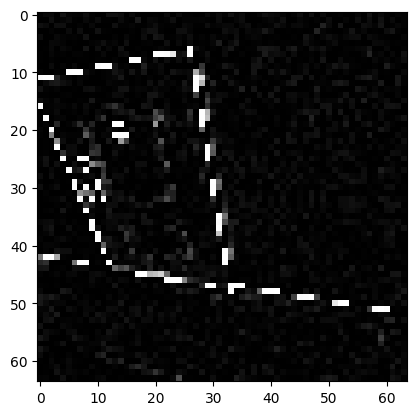

In [115]:
import matplotlib.pyplot as plt
TESTDIR = "/content/drive/MyDrive/diplom/test/door151.jpg"
# for img in os.listdir(TESTDIR):
#     try:
#         img_array = cv2.imread(os.path.join(TESTDIR, img))
#         new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#         new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#         predictions = model.predict(new_shape)
#         # plt.imshow(new_img)
#         # print(predictions)
#         print(LABELS[np.argmax(predictions)])
#     except Exception as e:
#         pass
img_array = cv2.imread(TESTDIR)
new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(new_shape)
plt.imshow(new_img)
print(predictions)
print(LABELS[np.argmax(predictions)])